In [53]:
import numpy as np
from pathlib import Path
from production import Problem, ExactSolver
from production.utils import get_mean_err
import matplotlib.pyplot as plt
import pickle
import seaborn as sns

In [5]:
experiment_path = Path("../data/loop_n_J_z_T_m")

In [10]:
energies = np.load(experiment_path / "energies.npy")
with open(experiment_path / "spins.pickle", "rb") as f:
    spins = np.array(pickle.load(f))

In [11]:
J_xs = np.linspace(2.0, 10.0, 10)
problems = [Problem(n_sites=8, J_x=J_x, J_z=1.0, temperature=1.0, m=6) for J_x in J_xs]

In [12]:
exact_energies = [ExactSolver(pb).energy.real for pb in problems]

In [13]:
mean_energies, err_energies = get_mean_err(energies)

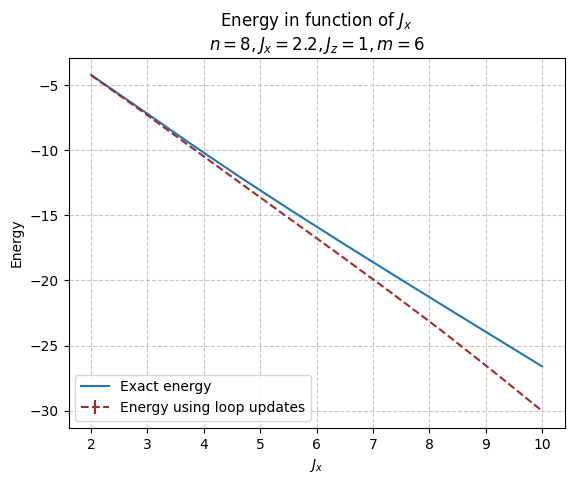

In [33]:
fig, ax = plt.subplots()
ax.set_title(r"Energy in function of $J_x$"
             "\n"
             r"$n=8, J_x=2.2, J_z=1, m=6$")
ax.plot(J_xs, exact_energies, label="Exact energy")
ax.errorbar(J_xs, mean_energies, err_energies, linestyle="dashed", label="Energy using loop updates", color="brown")
ax.set_xlabel("$J_x$")
ax.set_ylabel("Energy")
ax.legend(loc="lower left")
ax.grid(linestyle='--', alpha=0.7)
fig.savefig(Path("../figures/j_x.pdf"))
plt.show()

In [88]:
# (len(problems), n_rep, n_cycles, d)
mean_spins = np.mean(spins, axis=(1, 2))[:, 0:4]
std_spins = np.std(
    np.mean(spins, axis=2)[:, :, 0:4], axis=1
) / np.sqrt(spins.shape[1])

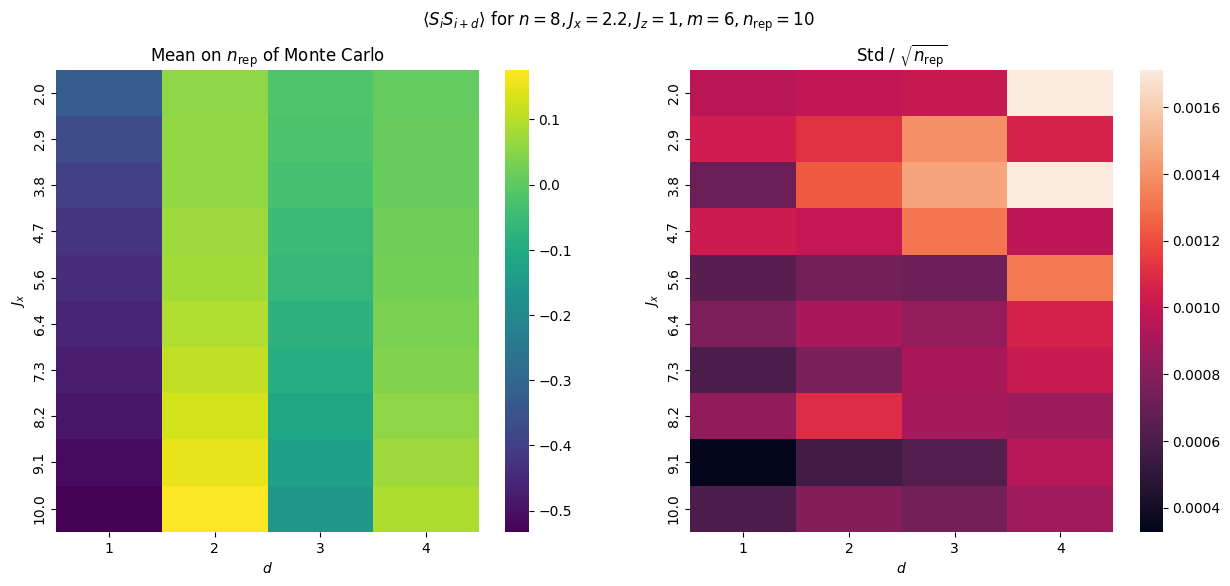

In [ ]:
# fig, ax = plt.subplots()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

fig.suptitle(r"$\langle S^z_i S^z_{i+d}\rangle$ for $n=8, J_x=2.2, J_z=1, m=6, n_\text{rep}=10$")

sns.heatmap(mean_spins, cmap='viridis', xticklabels=range(1, 5), yticklabels=[f"{J_x:0.1f}" for J_x in J_xs], ax=ax1)

# ax.set_xticks(range(1, 5))
ax1.set_xlabel("$d$")
ax1.set_ylabel("$J_x$")
ax1.set_title(r'Mean on $n_\text{rep}$ of Monte Carlo')


sns.heatmap(std_spins, xticklabels=range(1, 5), yticklabels=[f"{J_x:0.1f}" for J_x in J_xs], ax=ax2)
ax2.set_xlabel("$d$")
ax2.set_ylabel("$J_x$")
ax2.set_title(r'Std / $\sqrt{n_\text{rep}}$')

fig.savefig(Path("../figures/spins_J_x.pdf"))
plt.show()

In [81]:
# (len(problems), n_rep, n_cycles, d)
mean_distances = np.mean(spins[-1, :, :, 0:4], axis=(0, 1))
err_distances = np.std(np.mean(spins[-1, :, :, 0:4], axis=1), axis=0)

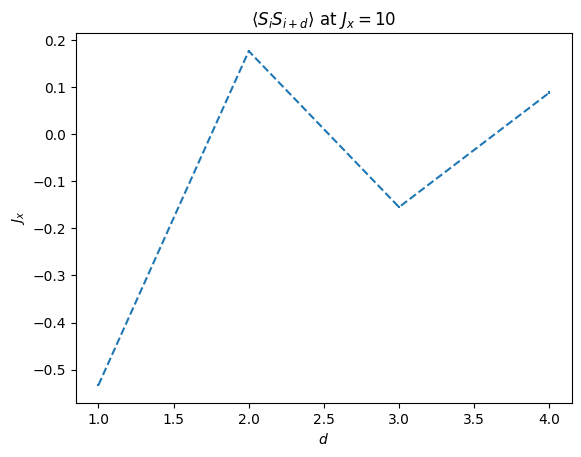

In [83]:
fig, ax = plt.subplots()

ax.errorbar(range(1, 5), mean_distances, err_distances, linestyle="dashed")
ax.set_xlabel("$d$")
ax.set_ylabel("$J_x$")
ax.set_title(r'$\langle S_i S_{i+d}\rangle$ at $J_x=10$')
fig.savefig(Path("../figures/spins_d_J_x.pdf"))
plt.show()